# Dokumen ini isinya gimana gue bikin prediksi pemain bola

In [1]:
# import semua basic library
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
# di sini gue import data yang mau gue analisis
df = pd.read_csv('data\\players.csv')

# preview data tersebut, biasanya gue cuma ngeliat 5 terbawah
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [3]:
# disini biasanya gue ngecek beberapa detail dari dataframe
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [4]:
# di sini gue ngecek beberapa filter untuk dive deep
df[df['height_cm']>200].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1834,220932,https://sofifa.com/player/220932/lovre-kalinic...,L. Kalinić,Lovre Kalinić,29,1990-04-03,201,99,Croatia,Aston Villa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3014,172203,https://sofifa.com/player/172203/fraser-forste...,F. Forster,Fraser Forster,31,1988-03-17,201,93,England,Southampton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3121,192613,https://sofifa.com/player/192613/costel-pantil...,C. Pantilimon,Costel Pantilimon,32,1987-02-01,203,96,Romania,Nottingham Forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4141,243538,https://sofifa.com/player/243538/karlo-letica/...,K. Letica,Karlo Letica,22,1997-02-11,201,96,Croatia,Club Brugge KV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4181,212382,https://sofifa.com/player/212382/paul-ebere-on...,P. Onuachu,Paul Ebere Onuachu,25,1994-05-28,201,82,Nigeria,FC Midtjylland,...,55+2,57+2,57+2,57+2,55+2,54+2,53+2,53+2,53+2,54+2


In [5]:
# karena terlalu banyak kolom, jadi gue cuma seleksi kolom mana aja yang bakal gue analisis.
# di sini gue mau tau gaji mereka sama nilai yang bisa mereka kasih
df_baru = pd.DataFrame(df, columns=['short_name', 'club', 'wage_eur', 'value_eur'])

# preview hasil dataframe yang baru
df_baru.head()

,short_name,club,wage_eur,value_eur
0,L. Messi,FC Barcelona,565000,95500000
1,Cristiano Ronaldo,Juventus,405000,58500000
2,Neymar Jr,Paris Saint-Germain,290000,105500000
3,J. Oblak,Atlético Madrid,125000,77500000
4,E. Hazard,Real Madrid,470000,90000000


In [6]:
# sekarang gue mau bikin colom baru yang engga ada di tabel itu, yaitu selisih antara gaji sama value mereka
df_baru['difference_eur'] = df_baru['value_eur'] - df_baru['wage_eur']

# preview
df_baru

,short_name,club,wage_eur,value_eur,difference_eur
0,L. Messi,FC Barcelona,565000,95500000,94935000
1,Cristiano Ronaldo,Juventus,405000,58500000,58095000
2,Neymar Jr,Paris Saint-Germain,290000,105500000,105210000
3,J. Oblak,Atlético Madrid,125000,77500000,77375000
4,E. Hazard,Real Madrid,470000,90000000,89530000
...,...,...,...,...,...
18273,Shao Shuai,Beijing Renhe FC,2000,40000,38000
18274,Xiao Mingjie,Shanghai SIPG FC,2000,40000,38000
18275,Zhang Wei,Hebei China Fortune FC,1000,40000,39000
18276,Wang Haijian,Shanghai Greenland Shenhua FC,1000,40000,39000


neymar selisihnya jauh juga ya...

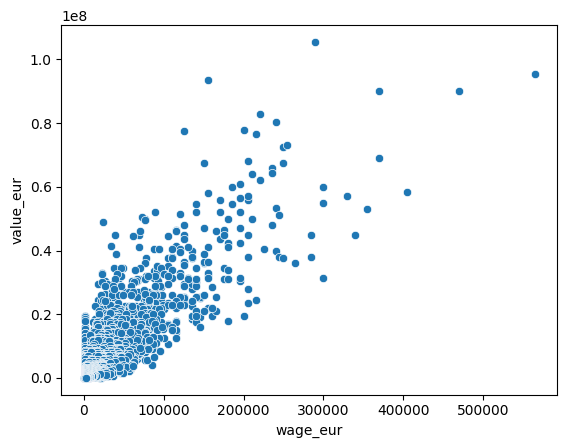

In [7]:
figure = sn.scatterplot(x='wage_eur', y='value_eur', data=df_baru)
figure;

In [8]:
# import library bokeh biar bisa show tampilan dinamis
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# masukin kategori untuk hover
hover = HoverTool(tooltips=[
    ('club', '@club'),
    ('gaji, nilai', '@wage_eur, @value_eur'),
    ('name', '@short_name'),
    ('selisih', '@difference_eur')])

# custom si tampilan figure
p = figure(title='data pemain sepak bola 2020',
           x_axis_label='gaji',
           y_axis_label='nilai',
           height=650,
           width=1200,
           tools=[hover])

# masukin kolom untuk X dan y
# atur juga ukuran si buletan
# masukin dataframe untuk si p
p.circle('wage_eur', 'value_eur', size=10, source=df_baru)
show(p)

karena bokeh bakal pake halaman yang beda, jadi kodenya berakhir di sini. semoga membantu

In [11]:
from skleran.lin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB
